In [1]:
import pandas as pd
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [2]:
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))
sys.path.append(os.path.abspath('../scripts'))

In [3]:
from scripts.data_loader import load_data, load_excel_data
from scripts.db_utils import fetch_data_from_db
from scripts.sql_query import get_user_data_query, load_data_from_postgres
from scripts.analysis import missing_values_table, convert_columns_to_mb,apply_ms_to_sec_and_drop, SatisfactionAnalyzer

In [4]:
# Define your query
query = "SELECT * FROM xdr_data;"  # Replace with the table or query you want

# Fetch data
data_tel = fetch_data_from_db(query)

# Display the data
if data_tel is not None:
    print(data_tel.head())
else:
    print("Failed to fetch data.")

c:\Users\fikad\Desktop\DESKTOP\10acedamy\Week_2\scripts\db_utils.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [5]:
analyzer = SatisfactionAnalyzer(data_tel)

# Aggregate user data
analyzer.preprocess_data()

In [6]:
# Perform engagement clustering
analyzer.cluster_engagement(n_clusters=3)

# Perform experience clustering
analyzer.cluster_experience(n_clusters=3)

In [7]:
# Calculate engagement score
analyzer.compute_engagement_score()

# Calculate experience score
analyzer.compute_experience_score()


Top 10 Most Satisfied Customers:
       MSISDN/Number  Satisfaction_Score
47983   3.366232e+10           84.594724
13180   3.362578e+10           61.792452
80249   3.368369e+10           49.472107
6437    3.361489e+10           39.557238
92923   3.376054e+10           37.397814
13526   3.362632e+10           36.889573
65118   3.366716e+10           35.680646
41944   3.366087e+10           31.172385
50281   3.366284e+10           29.340799
666     3.360313e+10           29.272204


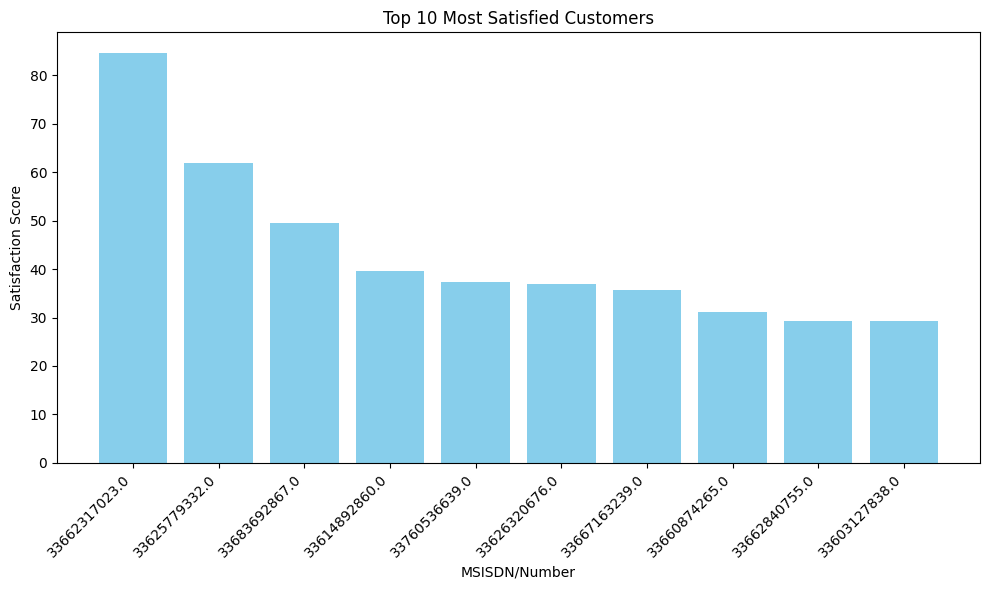

In [8]:
# Calculate satisfaction score
analyzer.compute_satisfaction_score()

# Find the top 10 most satisfied customers
analyzer.get_top_satisfied_customers(n=10)

Random Forest Regression RMSE: 0.07024643435937164
R² Score: 0.9881247604105031


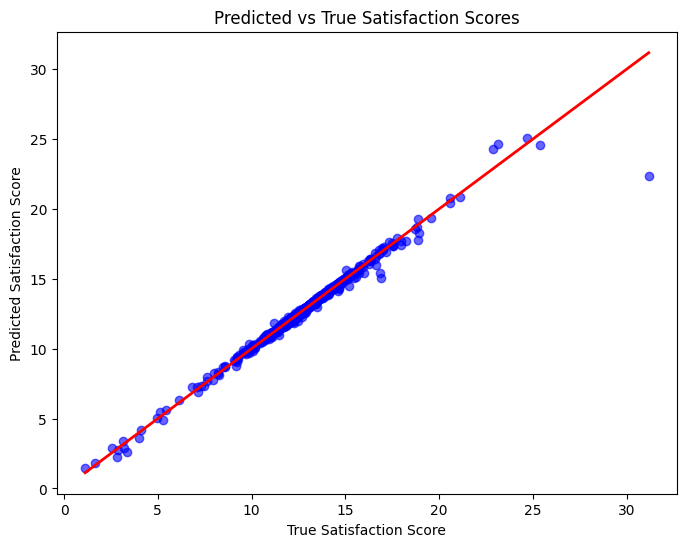

Satisfaction clustering completed with 2 clusters.


In [9]:
# Build a regression model to predict satisfaction score
analyzer.predict_satisfaction_with_rf()

# Perform K-Means clustering on satisfaction scores
analyzer.cluster_satisfaction(n_clusters=2)

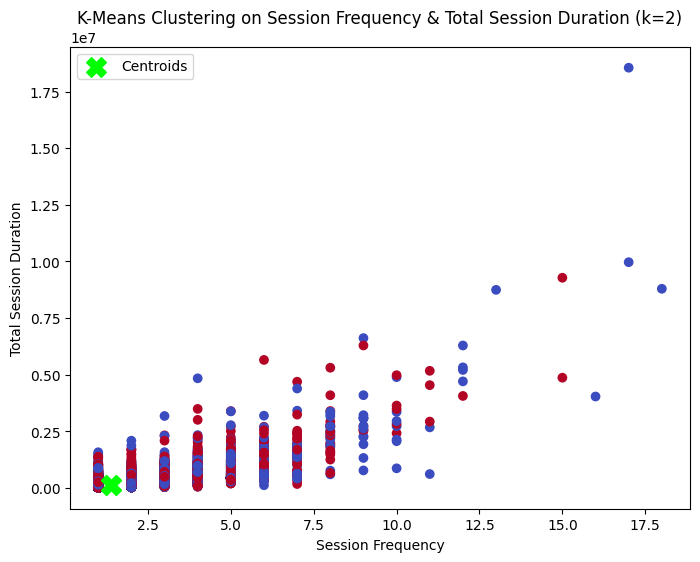

   Session_Frequency  Total_Session_Duration  Cluster
0                1.0                116720.0        1
1                1.0                181230.0        0
2                1.0                134969.0        1
3                1.0                 49878.0        0
4                2.0                 37104.0        1


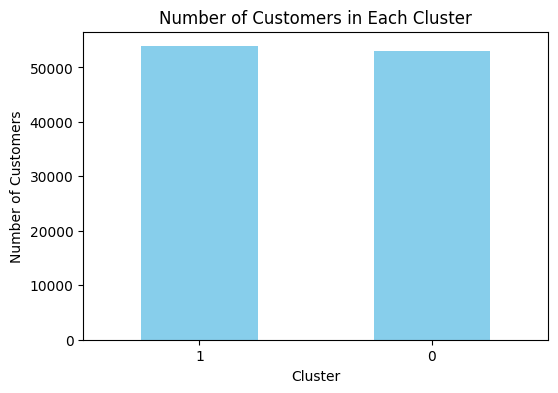

In [10]:
analyzer.analyze_satisfaction_clusters()


In [13]:
# Define your database connection parameters
DB_HOST = "localhost"
DB_PORT = 5432
DB_NAME = "telecome_data"
DB_USER = "postgres"
DB_PASSWORD = "blessed"
DB_TABLE ="satisfactory_analysis"

# Now you can use these variables for exporting data
analyzer.export_to_postgresql(
    host=DB_HOST,
    user=DB_USER,
    password=DB_PASSWORD,
    database=DB_NAME,  # Use DB_NAME here
    table_name=DB_TABLE,  # Make sure you have defined DB_TABLE
    port=DB_PORT
)


Data successfully exported to satisfactory_analysis table in telecome_data database.
